# Caminata Aleatoria.

In [1]:
library(quantmod)
library(tseries)
library(forecast)
library(TSA)
library(Quandl)

Loading required package: xts

Warning message:
"package 'xts' was built under R version 3.6.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 3.6.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Warning message:
"package 'TTR' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'tseries' was built under R version 3.6.3"
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




## Bases

In [2]:
getSymbols("INDPRO",src="FRED")  #Industrial Production Index
getSymbols("UMCSENT",src="FRED") #University of Michigan: Consumer Sentiment
getSymbols("FEDFUNDS",src="FRED") #tasa interes fondos federales
getSymbols("CCRETT01USM661N",src="FRED") #Tipo de cambio efectivo IPC
getSymbols("M2NS",src="FRED")     #Stock de dinero M2
getSymbols("PAYEMS",src="FRED")   # Des trabajadores no rurales
getSymbols("BOPGSTB",src="FRED")  #Balance cuenta, Diferencia entre exp e imp
getSymbols("EXUSUK",src="FRED")   #GBP mensual

[1] "INDPRO"

[1] "UMCSENT"

[1] "FEDFUNDS"

[1] "CCRETT01USM661N"

[1] "M2NS"

[1] "PAYEMS"

[1] "BOPGSTB"

[1] "EXUSUK"

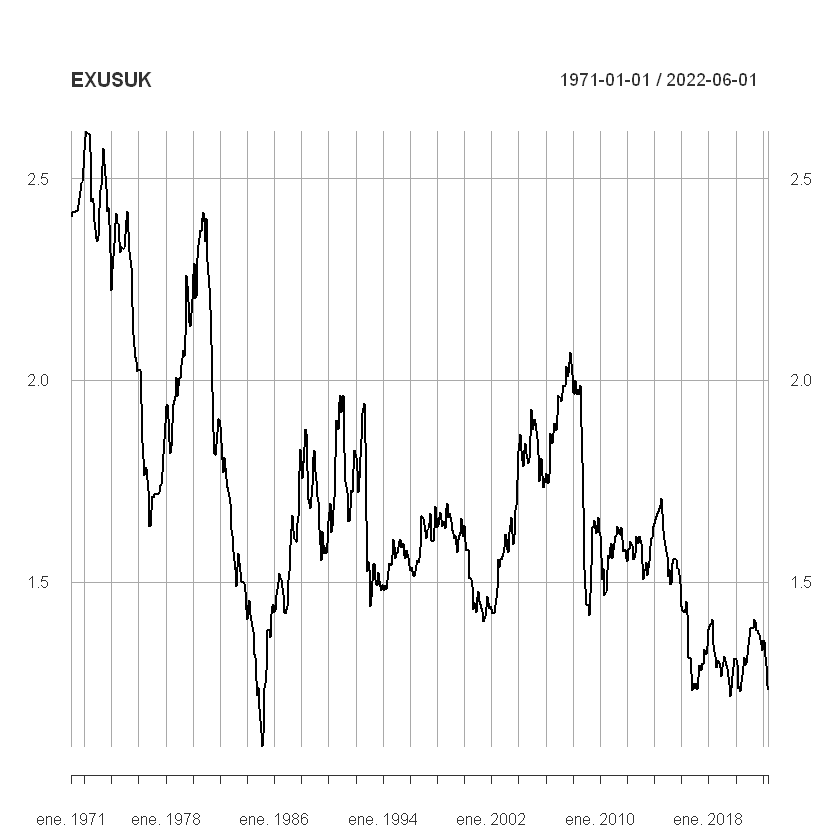

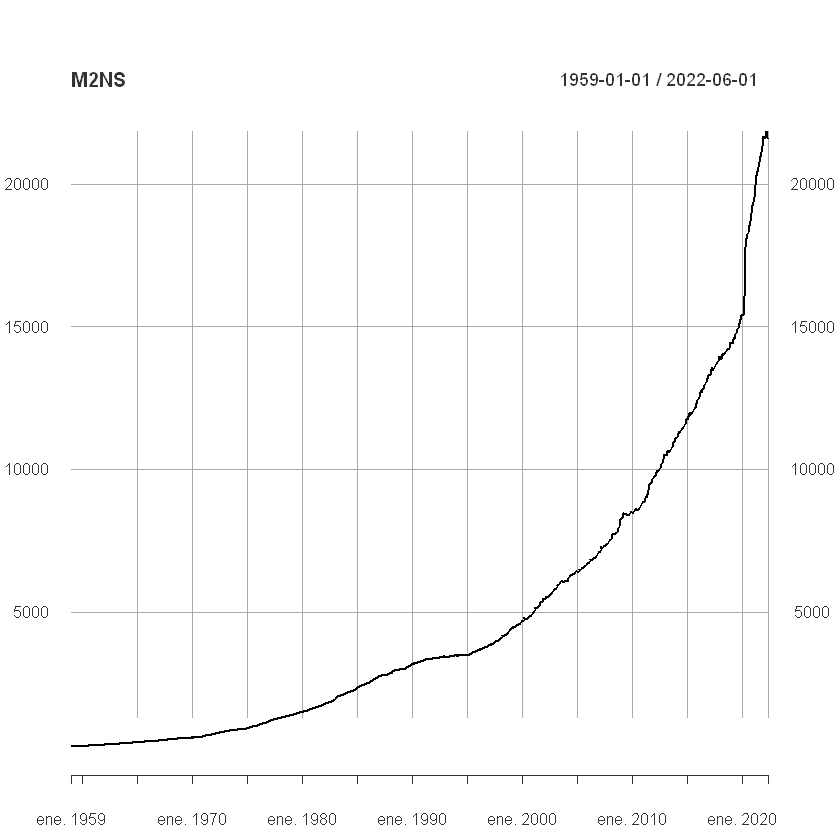

In [3]:
plot(EXUSUK,type="l")
plot(M2NS,type="l")

### Diferenciación

*Al ser una serie no estacionaria, se hace la diferenciación para que sea estacionaria 

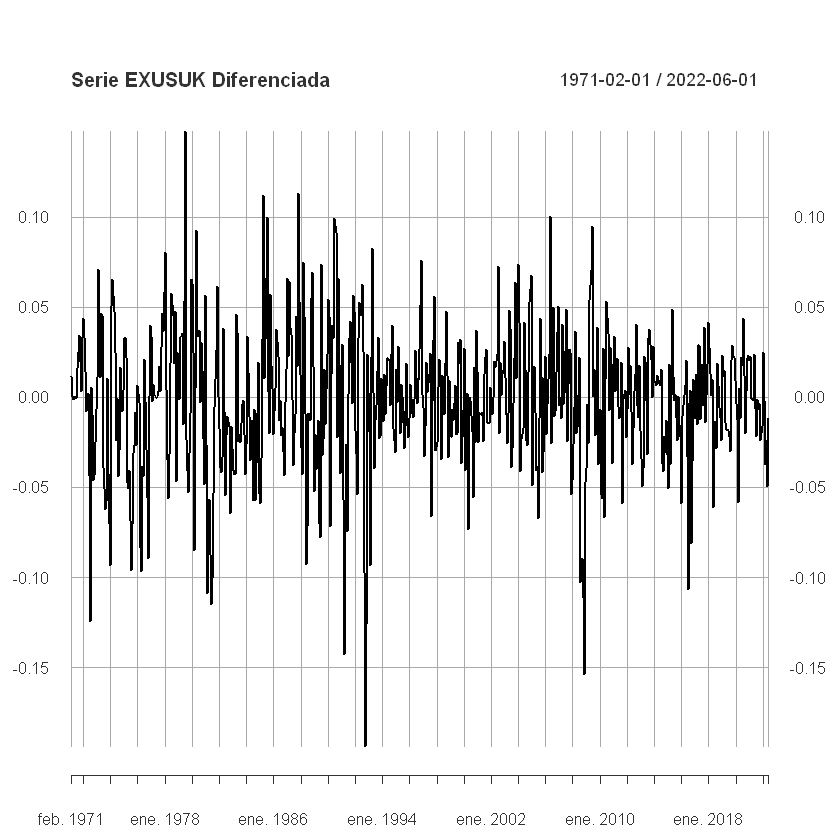

In [4]:
GBP_diff <- na.omit(diff(EXUSUK))
plot(GBP_diff,type="l",main ="Serie EXUSUK Diferenciada")

**Nota:** Aquí se observa como quedaron los datos con el ruido blanco, donde éstos se encuentras alrededor de 0.

## Simulación de caminata aleatoria sin deriva

In [5]:
Caminataleatoria <- arima.sim(model= list(order = c(0, 1, 0)), n=200)

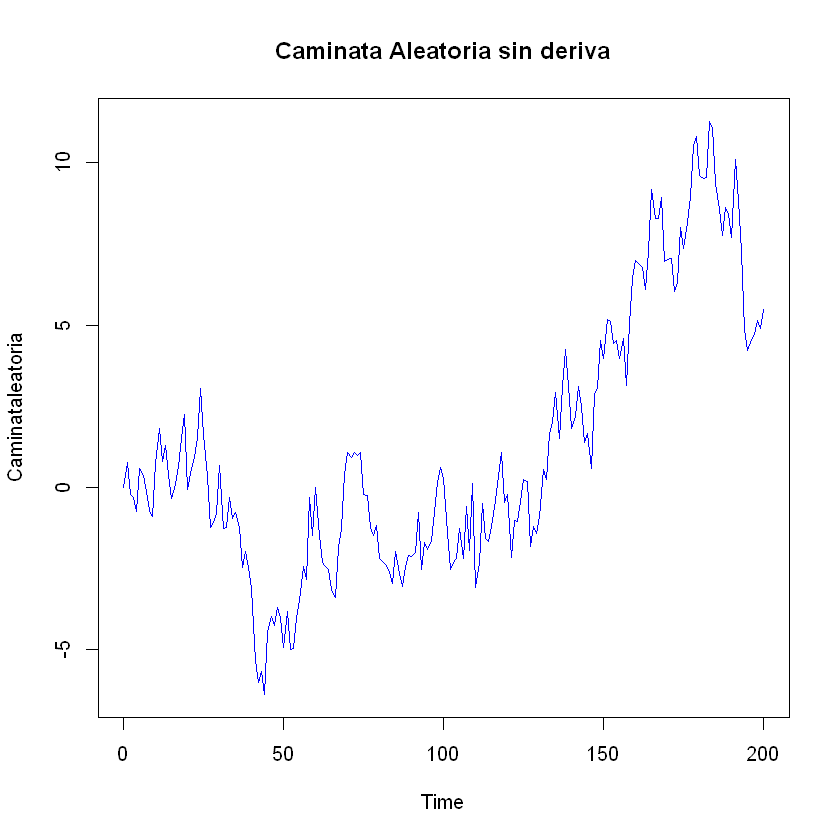

In [6]:
plot.ts(Caminataleatoria,main="Caminata Aleatoria sin deriva", col=4)

**Estacionariedad**

In [7]:
Caminataleatoria_diff <- diff(Caminataleatoria)

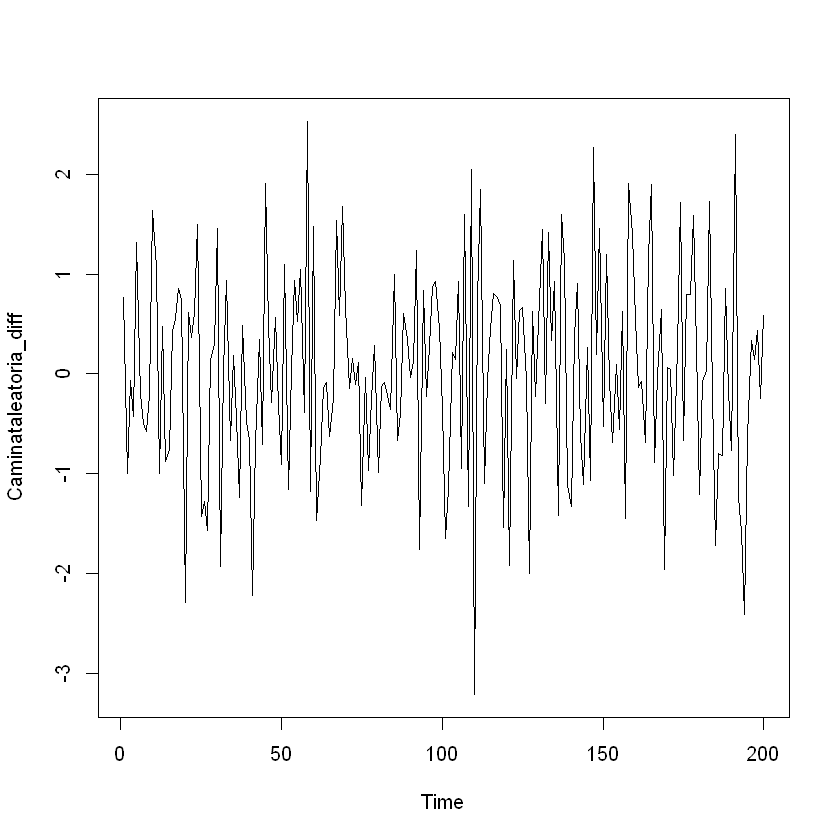

In [8]:
plot(Caminataleatoria_diff,type="l")

In [9]:
mean(Caminataleatoria_diff)
sd(Caminataleatoria_diff)

[1] 0.02737987

[1] 1.033523

## Simulación de caminata aleatoria con deriva

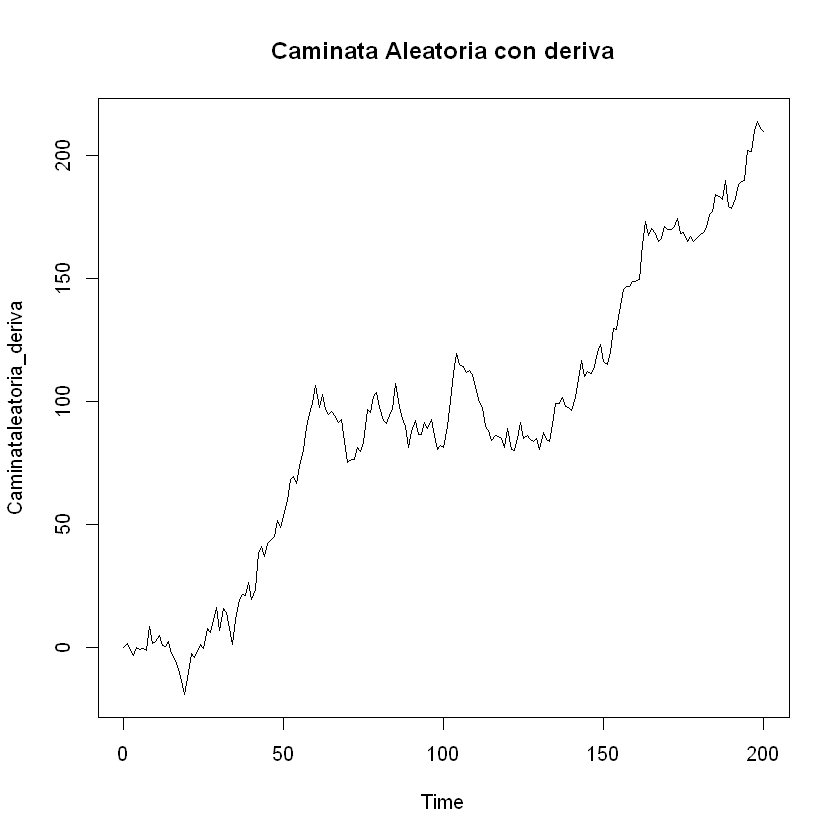

In [10]:
Caminataleatoria_deriva <- arima.sim(model= list(order = c(0, 1, 0)), n=200, mean=1,sd=5)
plot.ts(Caminataleatoria_deriva, main="Caminata Aleatoria con deriva")

### 1.Diferenciación 1er orden 

In [11]:
Caminataleatoria_deriva_diff <-diff(Caminataleatoria_deriva)

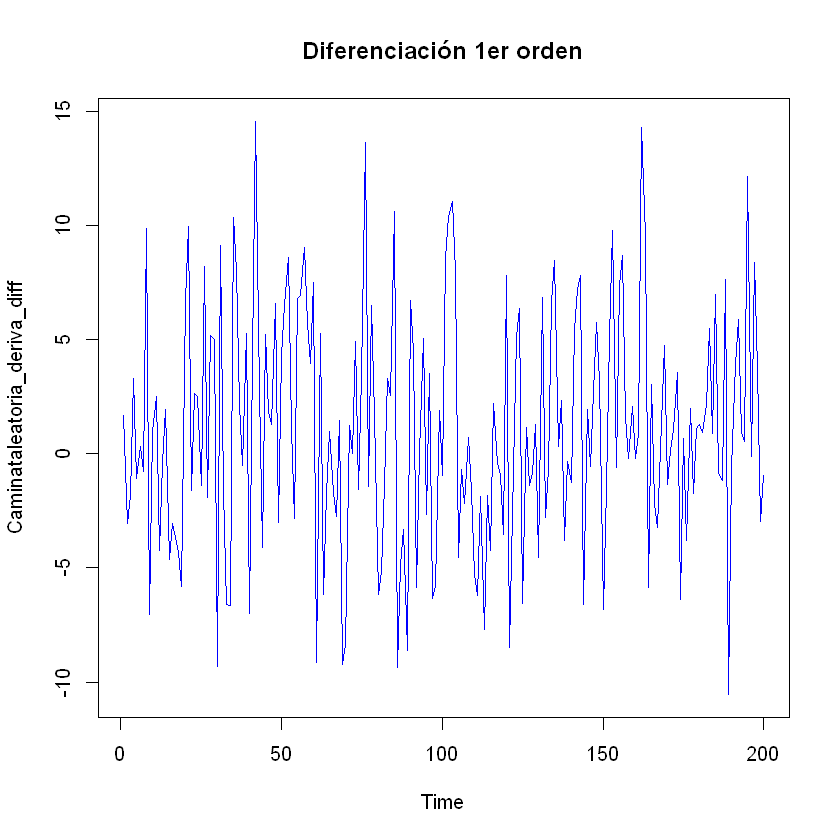

In [12]:
plot.ts(Caminataleatoria_deriva_diff, col=4, main="Diferenciación 1er orden")

### 2.Ruido blanco

In [13]:
ruido_blanco <- arima(Caminataleatoria_deriva_diff, order = c(0, 0, 0))
ruido_blanco


Call:
arima(x = Caminataleatoria_deriva_diff, order = c(0, 0, 0))

Coefficients:
      intercept
         1.0494
s.e.     0.3689

sigma^2 estimated as 27.22:  log likelihood = -614.18,  aic = 1230.37

### 3. Grafico Original con tendencia estimada

intercept 
 1.049396

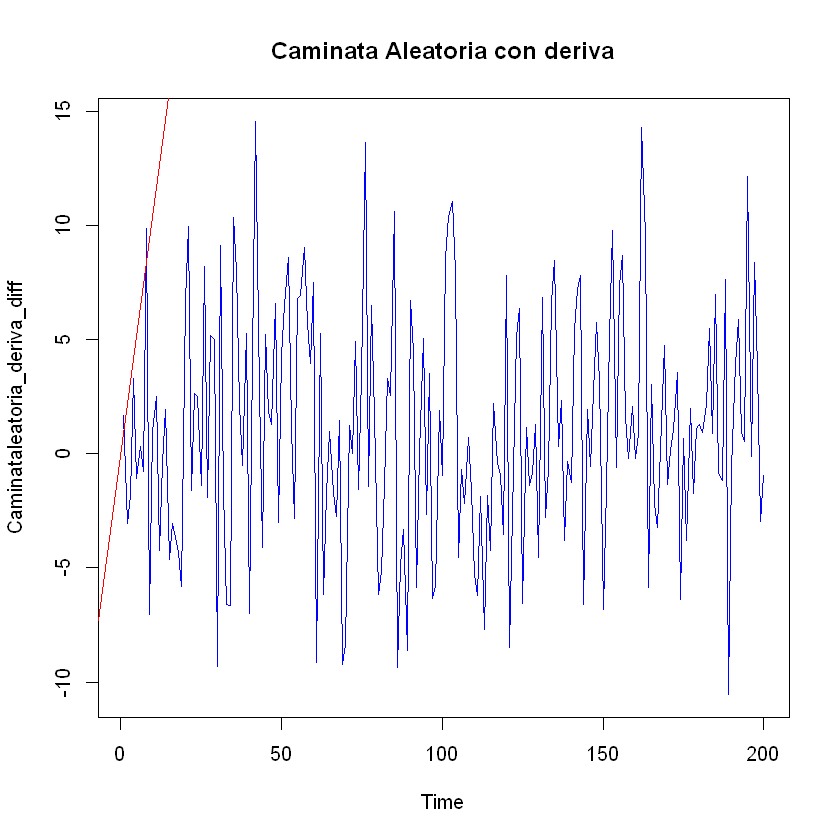

In [14]:
plot.ts(Caminataleatoria_deriva_diff,col=4, main="Caminata Aleatoria con deriva")
abline(0, ruido_blanco$coef,col=2)

ruido_blanco$coef